## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

## Print Image

In [ ]:
def print_img(title, img):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

## Read Image

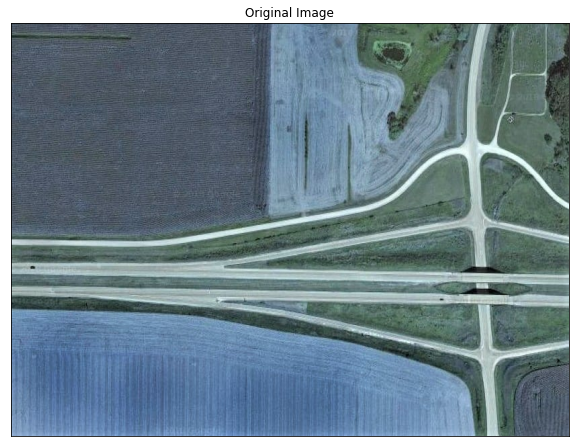

In [ ]:
img = cv2.imread('fimg13.jpeg')
print_img("Original Image", img) 

## Convert Image to GrayScale

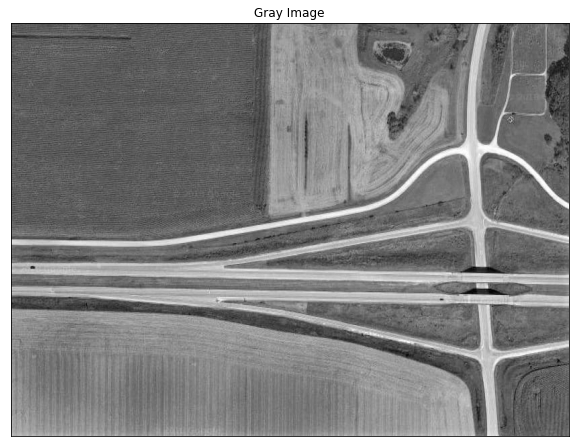

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print_img("Gray Image", img_gray)

## Contrast Strech Image

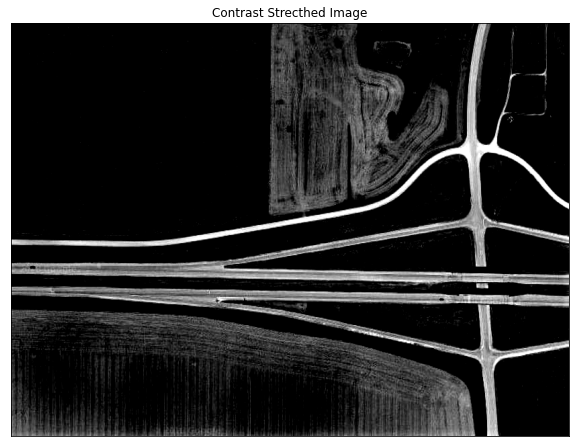

In [ ]:
img_con_strech = np.copy(img_gray)
img_con_strech = img_con_strech.astype(np.float32)

min_val = 0.5 * 255
max_val = 0.9 * 255

img_con_strech = 255*(img_con_strech-min_val)/(max_val-min_val)
img_con_strech[img_con_strech > 255] = 255
img_con_strech[img_con_strech < 0] = 0

img_con_strech = img_con_strech.astype(np.uint8)

print_img("Contrast Strecthed Image", img_con_strech)

## Thresholding

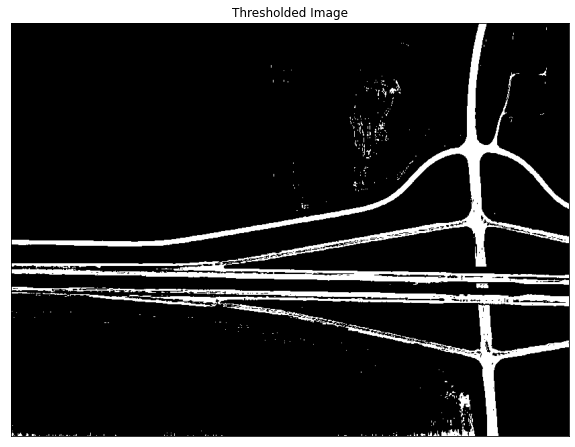

In [ ]:
level = 0.5
level_val = level * 255
img_thres = np.copy(img_con_strech)
img_thres[img_thres < level_val] = 0
img_thres[img_thres >= level_val] = 255

print_img("Thresholded Image", img_thres)

## Median Filter
 - To reduce noise
 - It is named median but will act as a majority filter.

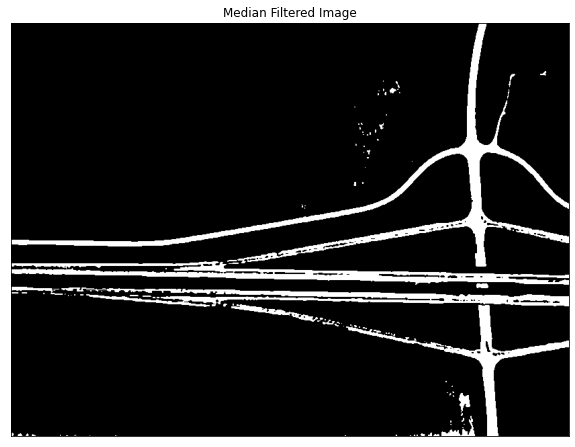

In [ ]:
img_med_filter = cv2.medianBlur(img_thres, 3)
print_img("Median Filtered Image", img_med_filter)

## Dilation

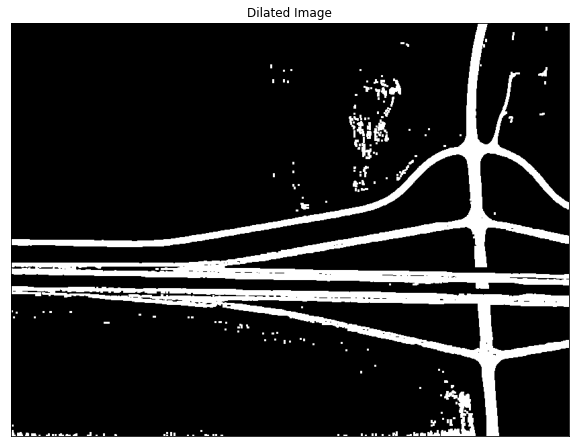

In [ ]:
img_dilation = cv2.dilate(img_thres, np.ones((3, 3), np.uint8), iterations=1)
print_img("Dilated Image", img_dilation)

## Morphological Enhancement
 - remove regions with less than 10000 pixels

In [ ]:
def bwareaopen(img, min_size, connectivity=8):
    """Remove small objects from binary image.
    
    Args:
        img: a binary image (dtype=uint8) to remove small objects from
        min_size: minimum size (in pixels) for an object to remain in the image
        connectivity: Pixel connectivity; either 4 (connected via edges) or 8 (connected via edges and corners).
        
    Returns:
        the binary image with small objects removed
    """
    
    # Find all connected components (called here "labels")
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img, connectivity=connectivity)
    
    # check size of all connected components (area in pixels)
    for i in range(num_labels):
        label_size = stats[i, cv2.CC_STAT_AREA]
        
        # remove connected components smaller than min_size
        if label_size < min_size:
            img[labels == i] = 0
            
    return img

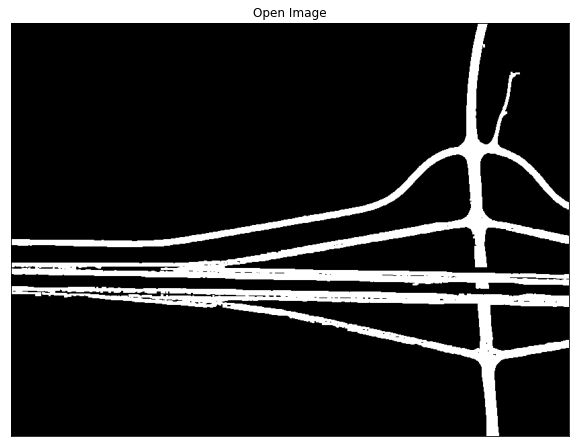

In [ ]:
img_open = bwareaopen(img_dilation, 10000, connectivity=4)
print_img("Open Image", img_open)

## Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object

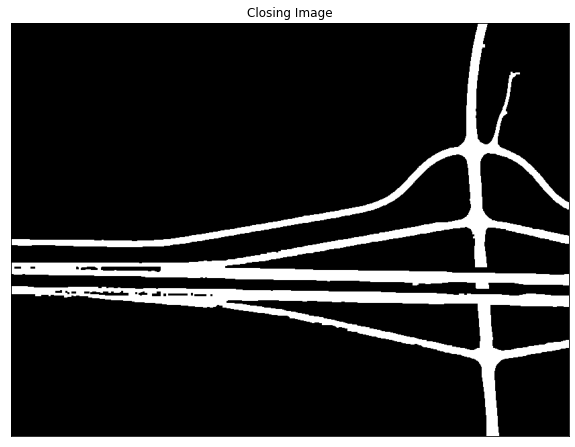

In [ ]:
img_closing = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
print_img("Closing Image", img_closing)

## Edge detection
 - Canny edge detection

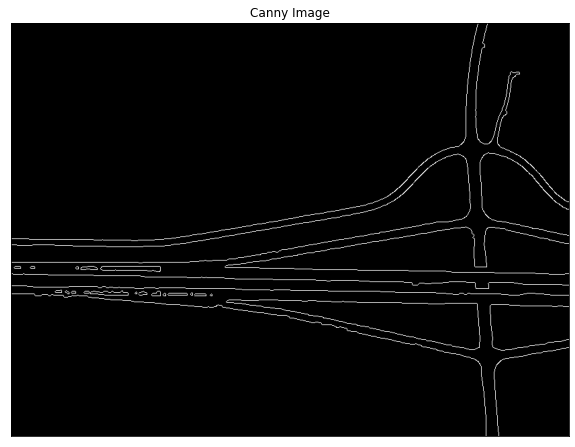

In [ ]:
img_edge_canny = cv2.Canny(img_closing, 500, 500)
print_img("Canny Image", img_edge_canny)

 - Morphological Gradient

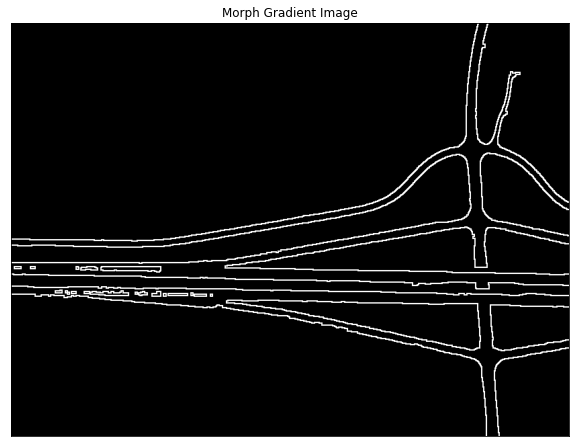

In [ ]:
img_edge_morph_grad = cv2.morphologyEx(img_closing, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8), iterations=1)
print_img("Morph Gradient Image", img_edge_morph_grad)

## Closing Operation
 - Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object

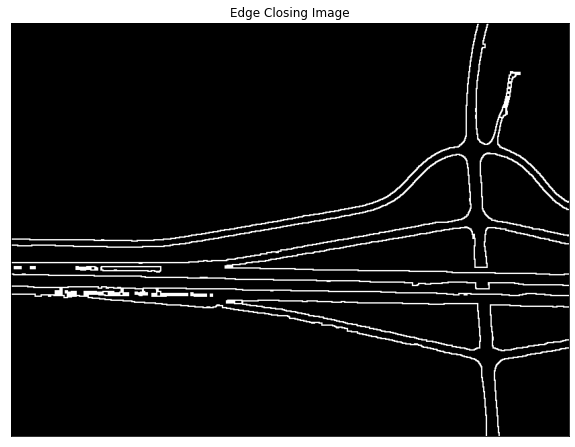

In [ ]:
img_edge_closing = cv2.morphologyEx(img_edge_morph_grad, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
print_img("Edge Closing Image", img_edge_closing)

## Overlay extracted roads to original image


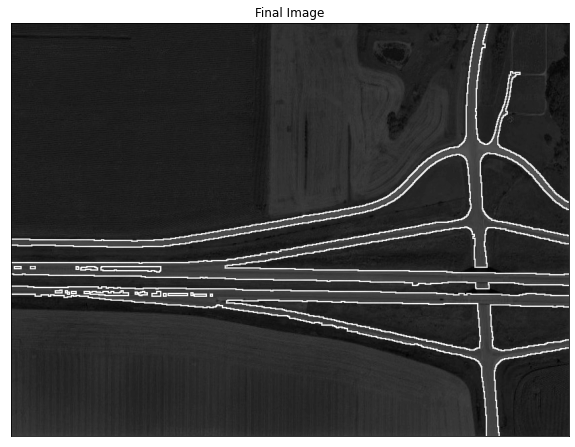

In [ ]:
background = Image.fromarray(img_gray)
overlay = Image.fromarray(img_edge_morph_grad)

final_img = Image.blend(background, overlay, 0.7)

print_img("Final Image", final_img)

## Script
 - Below is code is a script.
 - Copy it.
 - Save it.
 - Change the input folder name and output folder name in code
 - Run it locally.


```py
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

def print_img(title, img):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(np.array(img), cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

def bwareaopen(img, min_size, connectivity=8):
    """Remove small objects from binary image (approximation of 
    bwareaopen in Matlab for 2D images).
    Args:
        img: a binary image (dtype=uint8) to remove small objects from
        min_size: minimum size (in pixels) for an object to remain in the image
        connectivity: Pixel connectivity; either 4 (connected via edges) or 8 (connected via edges and corners).
    Returns:
        the binary image with small objects removed
    """
    # Find all connected components (called here "labels")
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img, connectivity=connectivity)
    # check size of all connected components (area in pixels)
    for i in range(num_labels):
        label_size = stats[i, cv2.CC_STAT_AREA]
        # remove connected components smaller than min_size
        if label_size < min_size:
            img[labels == i] = 0
    return img

def runner(image_name):
    img = cv2.imread(image_name)
    # print_img("Original Image", img) 
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print_img("Gray Image", img_gray)
    
    img_con_strech = np.copy(img_gray)
    img_con_strech = img_con_strech.astype(np.float32)
    
    min_val = 0.5 * 255
    max_val = 0.9 * 255
    
    img_con_strech = 255*(img_con_strech-min_val)/(max_val-min_val)
    img_con_strech[img_con_strech > 255] = 255
    img_con_strech[img_con_strech < 0] = 0
    
    img_con_strech = img_con_strech.astype(np.uint8)
    
    # print_img("Contrast Strecthed Image", img_con_strech)
    
    level = 0.5
    level_val = level * 255
    img_thres = np.copy(img_con_strech)
    img_thres[img_thres < level_val] = 0
    img_thres[img_thres >= level_val] = 255
    
    # print_img("Thresholded Image", img_thres)
    
    img_med_filter = cv2.medianBlur(img_thres, 3)
    # print_img("Median Filtered Image", img_med_filter)
    
    img_dilation = cv2.dilate(img_thres, np.ones((3, 3), np.uint8), iterations=1)
    # print_img("Dilated Image", img_dilation)
    
    img_open = bwareaopen(img_dilation, 5000, connectivity=4)
    # print_img("Open Image", img_open)
    
    img_closing = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
    # print_img("Closing Image", img_closing)
    
    img_edge_canny = cv2.Canny(img_closing, 500, 500)
    # print_img("Canny Image", img_edge_canny)
    
    img_edge_morph_grad = cv2.morphologyEx(img_closing, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8), iterations=1)
    # print_img("Morph Gradient Image", img_edge_morph_grad)
    
    img_edge_closing = cv2.morphologyEx(img_edge_morph_grad, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
    # print_img("Edge Closing Image", img_edge_closing)
    
    background = Image.fromarray(img_gray)
    overlay = Image.fromarray(img_edge_morph_grad)
    
    final_img = Image.blend(background, overlay, 0.7)
    
    # print_img("Final Image", final_img)
    cv2.imwrite("{}_final_img.jpg".format(image_name), np.array(final_img))
    
# main
# extract all file names from Input images folder
import os
name = []
for file in os.listdir("./Input_Images3"):
    name.append(file)

name = name[0:]

for a in name:
    print(a)
    runner("./Input_Images3/"+str(a))
```

